# imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
from astropy.coordinates import SkyCoord
from matplotlib.ticker import AutoMinorLocator

# settings

In [2]:
plt.rcParams['text.usetex']        = True
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.serif']         = 'Computer Modern Roman'
plt.rcParams['text.latex.preview'] = True
plt.rcParams['axes.labelsize']     = 26.
plt.rcParams['axes.titlesize']     = 30.
plt.rcParams['xtick.labelsize']    = 24.
plt.rcParams['ytick.labelsize']    = 24.
plt.rcParams['xtick.top']          = False
plt.rcParams['ytick.right']        = False
plt.rcParams['xtick.direction']    = 'in'
plt.rcParams['ytick.direction']    = 'in'
plt.rcParams['xtick.major.size']   = 7.
plt.rcParams['xtick.minor.size']   = 4.
plt.rcParams['ytick.major.size']   = 7.
plt.rcParams['ytick.minor.size']   = 4.
plt.rcParams['legend.fontsize']    = 16.
plt.rcParams['legend.frameon']     = True
plt.rcParams['xtick.major.pad']    = 10
plt.rcParams['ytick.major.pad']    = 10
plt.rcParams['axes.titlepad']      = 10
plt.rcParams['figure.figsize']     = (12,10)
plt.rcParams['figure.dpi']         = 120

titlepad = 20
labelpad = 10
commonY  = 30

# plot

/Users/nk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in double_scalars


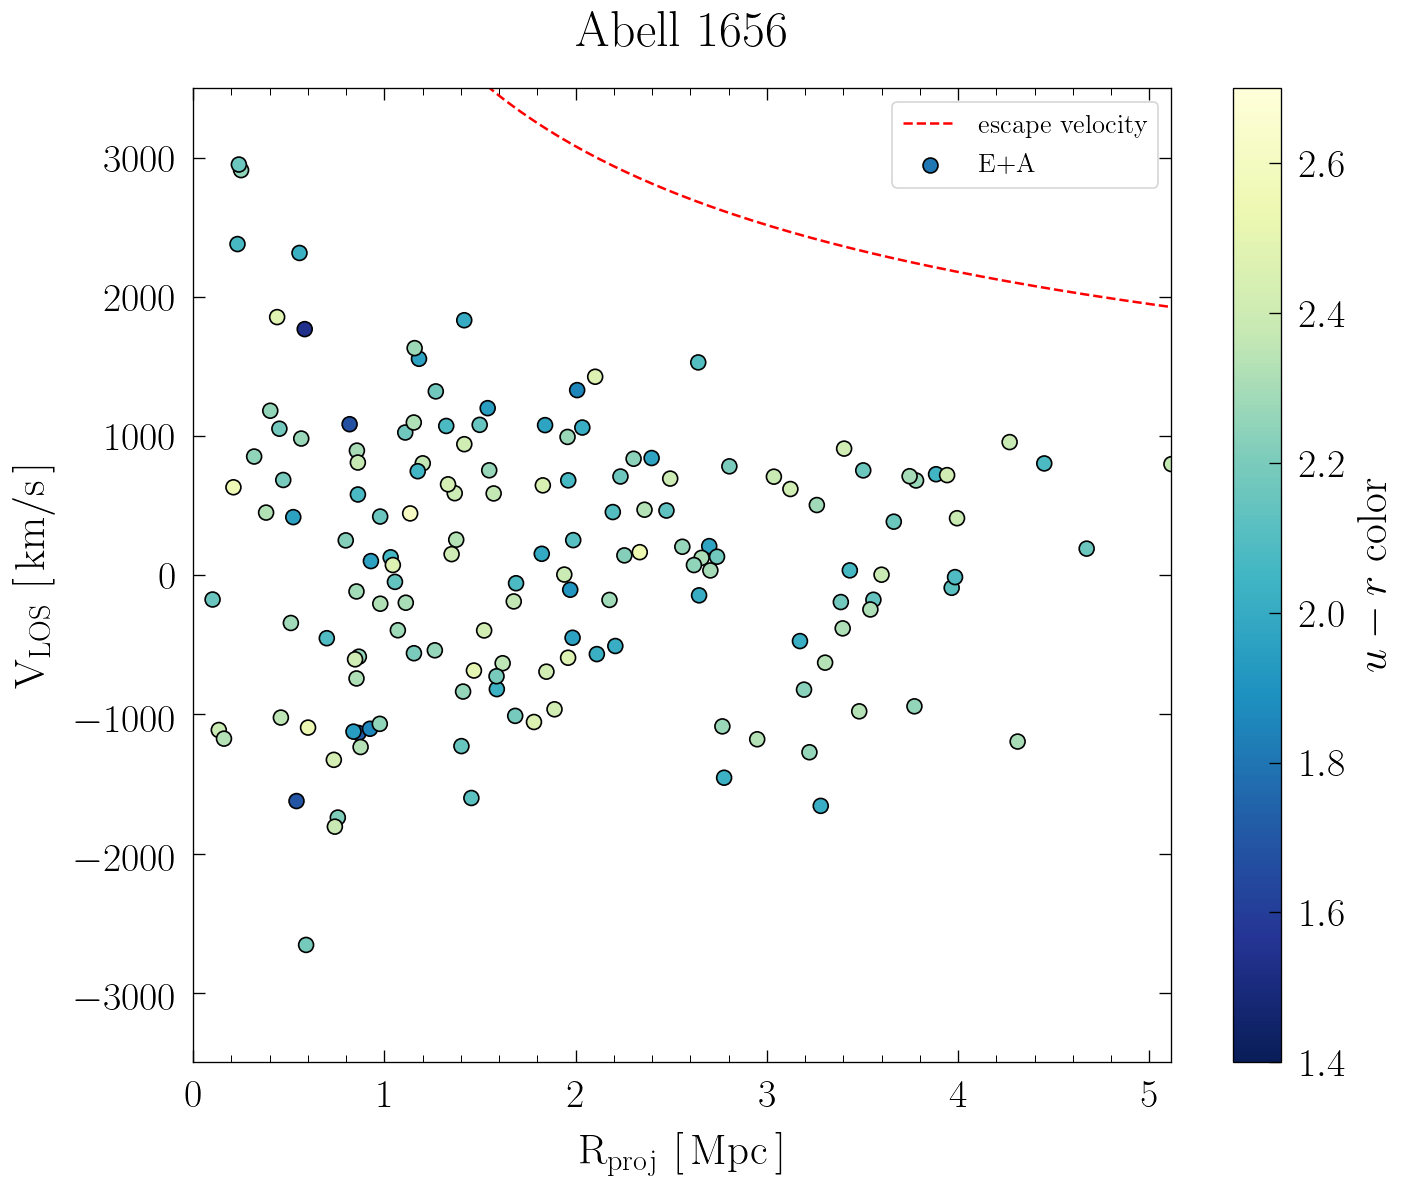

In [4]:
# =============================================
# ----------------- CONSTANTS -----------------
# =============================================

G    = 6.674e-20     # units: km^3 kg^-1 s^-2
c    = 299792.458    # units: km/s
Msun = 1.989e30      # units: kg


# =============================================
# ----- THE ONLY THING YOU'LL NEED TO EDIT ----
# =============================================

# Feel free to read multiple files here.
file = pd.read_csv("projected_phase_space.csv", sep=',', header=0)

cluster = {'name': "Abell 1656",
           'distance': 3.055e21,          # units: km (99 Mpc)
           'velocity': 0.0234 * c,        # units: km/s
           'mass': 2.1488e15 * Msun,      # units: kg
           'coord': SkyCoord('12h59m48.7s', '+27d58m50s', frame='icrs')}

# List each file name in 'galaxies'. These lists
# should always be the same length.
galaxies    = [file]
markersizes = [80]
labels      = ['E+A']
markers     = ['o']


# =============================================
# ------------------- PLOT! -------------------
# =============================================

fig, ax = plt.subplots()

cmap    = 'YlGnBu_r'

for galaxy, m, s, l in zip(galaxies, markers, markersizes, labels):
    
    # =============================================
    # ------ FIND DISTANCE TO CLUSTER CENTER ------
    # =============================================
    
    galaxy_coordinate  = SkyCoord(galaxy['ra'], galaxy['dec'], frame='icrs')
    degrees_separation = cluster['coord'].separation(galaxy_coordinate)
    galaxy['deg_sep']  = degrees_separation

    tempList = []

    for degree in galaxy['deg_sep']:  
        radians = np.radians(degree)
        dist = np.tan(radians) * cluster['distance']
        tempList.append(dist)

    galaxy['dist'] = tempList
    
    # =============================================
    # ----------- CALCULATE LOS VELOCITY ----------
    # =============================================

    tempList = []

    for z in galaxy['redshift']:
        velocity = (z * c) - cluster['velocity']
        tempList.append(velocity)

    galaxy['vels'] = tempList

    # =============================================
    # ------------------- PLOT! -------------------
    # =============================================
    
    plt.scatter(galaxy['dist'], galaxy['vels'], c=galaxy['uMINUSr'], 
                cmap=cmap, marker=m, edgecolor='k', s=s, label=l)


# =============================================
# --------- CALCULATE ESCAPE VELOCITY ---------
# =============================================

radii = np.linspace(0, max(file['dist']), 150)
escapeVel = []

for radius in radii:
    escapeVel.append(np.sqrt(2*G*cluster['mass']/radius))
        
plt.plot(radii, escapeVel, color='red', ls='--', label="escape velocity")


# =============================================
# ---------------- READABILITY ----------------
# =============================================

# scales the x-axis from km to Mpc
km_per_Mpc = 3e19
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/km_per_Mpc))
ax.xaxis.set_major_formatter(ticks_x)
ax.set_xticks(list(map(lambda x: x*km_per_Mpc, [0,1,2,3,4,5])))

# adds a colorbar    
plt.colorbar(cmap=cmap, label='$u-r\,\,\mathrm{color}$')
plt.clim(1.4, 2.7)

# plot labels
plt.title(cluster['name'], pad=25)
plt.xlabel("$\mathrm{R_{proj}}\,\,[\,\mathrm{Mpc}\,]$", labelpad=labelpad)
plt.ylabel("$\mathrm{V_{LOS}}\,\,[\,\mathrm{km/s}\,]$", labelpad=labelpad)

# plot limits
plt.xlim(0, max(file['dist']))
plt.ylim(-3500, 3500)

# adds major and minor ticks all around the plot
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(right='true', top='true', which='both')

# shows the legend and makes sure labels aren't cut off
# when saved as a PDF
plt.legend()
plt.tight_layout()
plt.savefig("coma_phase_space.pdf")